In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
class ShallowModel(nn.Module):
    def __init__(self, in_features=1, h1=18, h2=18, out_features=1):
        super().__init__()

        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, X):
        X = F.tanh(self.fc1(X))
        X = F.tanh(self.fc2(X))
        X = self.out(X)

        return X

In [ ]:
class DeepModel(nn.Module):
  def __init__(self, in_feature=1, h1=8, h2=8, h3=8, h4=8, h5=8, h6=8, out_feature=1):
    super().__init__()

    self.fc1 = nn.Linear(in_feature, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.fc4 = nn.Linear(h3, h4)
    self.fc5 = nn.Linear(h4, h5)
    self.fc6 = nn.Linear(h5, h6)
    self.out = nn.Linear(h6, out_feature)

  def forward(self, X):
    X = F.tanh(self.fc1(X))
    X = F.tanh(self.fc2(X))
    X = F.tanh(self.fc3(X))
    X = F.tanh(self.fc4(X))
    X = F.tanh(self.fc5(X))
    X = F.tanh(self.fc6(X))
    X = self.out(X)

    return X

In [ ]:
def f1(X):
  return X**2

def f2(X2):
  y =[]

  for x in X2:

    val = math.sin(5*math.pi*x)/(5*math.pi*x)
    y.append(val)

  return y

In [ ]:
X1 = np.linspace(0, 2, 500)
X2 = np.linspace(math.pi/1000, math.pi/2, 500)
y1 = f1(X1)
y2 = f2(X2)

X1 = torch.tensor(X1).float().view(-1,1)
y1 = torch.tensor(y1).float().view(-1,1)
X2 = torch.tensor(X2).float().view(-1,1)
y2 = torch.tensor(y2).float().view(-1,1)


In [ ]:
model0 = ShallowModel()
model1 = DeepModel()

criterion = nn.MSELoss()
optimizer0 = optim.Adam(model0.parameters(), lr=0.001)
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)

In [ ]:
losses0 = []
losses1 = []
epoch_list = []
epochs = 20000

In [ ]:
for i in range(epochs):

  epoch_list.append(i)

  y_pred0 = model0.forward(X1)
  y_pred1 = model1.forward(X1)

  loss0 = criterion(y_pred0, y1)
  loss1 = criterion(y_pred1, y1)

  optimizer0.zero_grad()
  optimizer1.zero_grad()

  loss0.backward()
  loss1.backward()

  losses0.append(loss0.detach().numpy())
  losses1.append(loss1.detach().numpy())

  optimizer0.step()
  optimizer1.step()

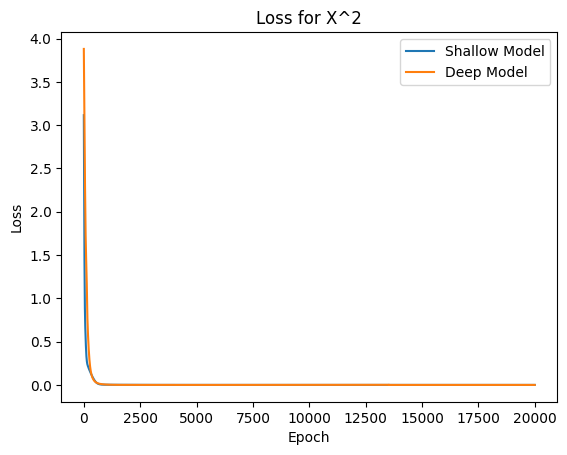

In [ ]:
plt.plot(epoch_list, losses0, label='Shallow Model')
plt.plot(epoch_list, losses1, label='Deep Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss for X^2')
plt.legend()
plt.show()


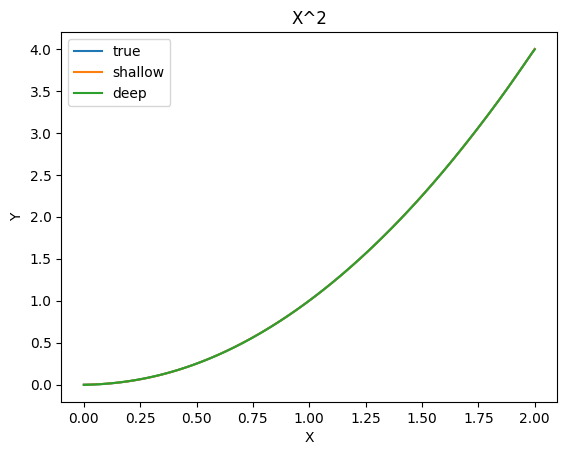

In [ ]:
plt.figure()

y_pred0 = y_pred0.detach().numpy()
y_pred1 = y_pred1.detach().numpy()

plt.plot(X1, y1, label='true')
plt.plot(X1, y_pred0, label='shallow')
plt.plot(X1, y_pred1, label='deep')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X^2')
plt.legend()
plt.show()

In [ ]:
losses0 = []
losses1 = []
epoch_list = []
epochs = 20000

In [ ]:
model0 = ShallowModel()
model1 = DeepModel()

criterion = nn.MSELoss()
optimizer0 = optim.Adam(model0.parameters(), lr=0.001)
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)

In [ ]:
for i in range(epochs):

  epoch_list.append(i)

  y_pred0 = model0.forward(X2)
  y_pred1 = model1.forward(X2)

  loss0 = criterion(y_pred0, y2)
  loss1 = criterion(y_pred1, y2)

  optimizer0.zero_grad()
  optimizer1.zero_grad()

  loss0.backward()
  loss1.backward()

  losses0.append(loss0.detach().numpy())
  losses1.append(loss1.detach().numpy())

  optimizer0.step()
  optimizer1.step()

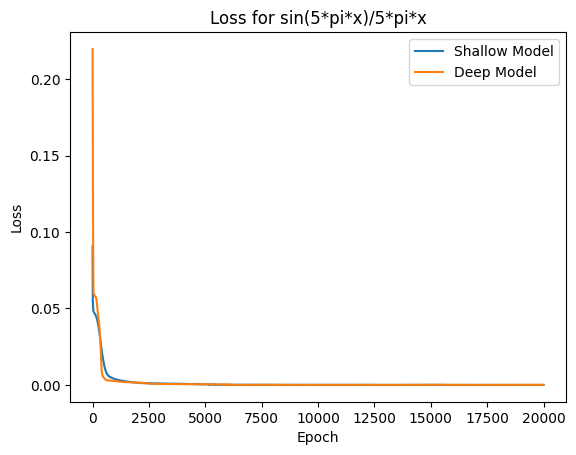

In [ ]:
plt.plot(epoch_list, losses0, label='Shallow Model')
plt.plot(epoch_list, losses1, label='Deep Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss for sin(5*pi*x)/5*pi*x')
plt.legend()
plt.show()

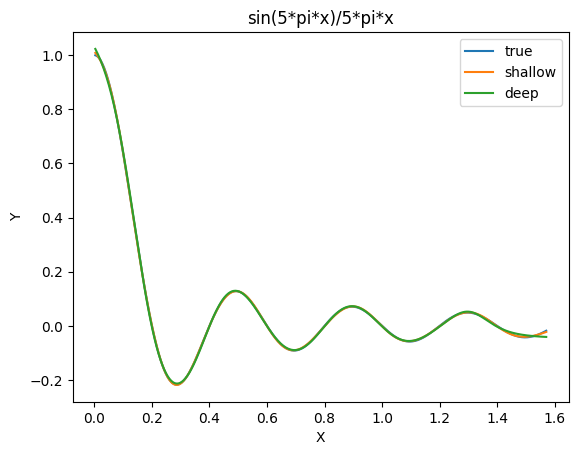

In [ ]:
plt.figure()

y_pred0 = y_pred0.detach().numpy()
y_pred1 = y_pred1.detach().numpy()

plt.plot(X2, y2, label='true')
plt.plot(X2, y_pred0, label='shallow')
plt.plot(X2, y_pred1, label='deep')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('sin(5*pi*x)/5*pi*x')
plt.legend()
plt.show()